In [1]:
import mne
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = [6., 4.]

def plot_bar(x):
    colors = ('orange', 'green', 'blue', 'purple')
    bars = plt.bar(('theta', 'alpha', 'beta', 'gamma'), x, color=colors)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.title('Porcentagem da potência em cada banda de frequência')
    plt.xlabel('Banda de Frequência')
    plt.ylabel('Porcentagem durante a atividade')

    # Exibir o gráfico
    plt.show()

André em Glucagon Ativa


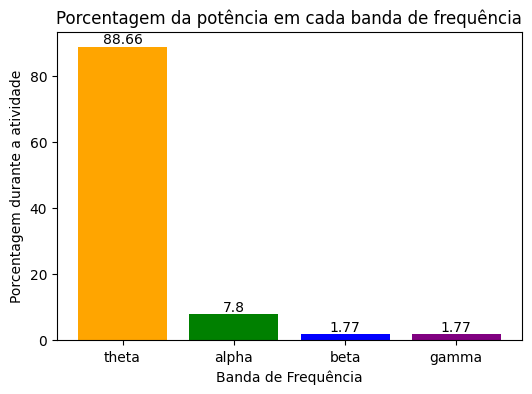

André em Glucagon Ativa (Teste)


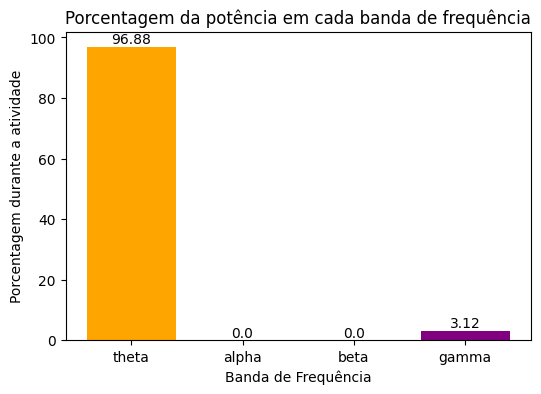

André em Insulina Tradicional


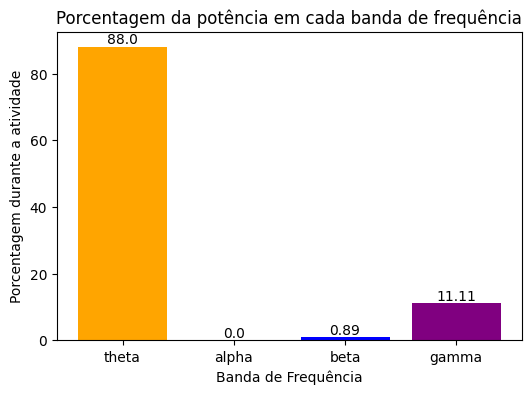

André em Insulina Tradicional (Teste)


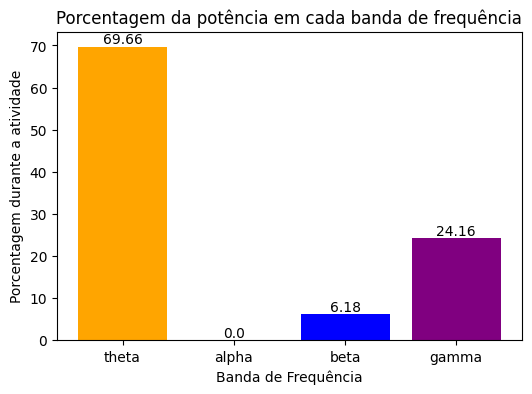

André em Teste Final


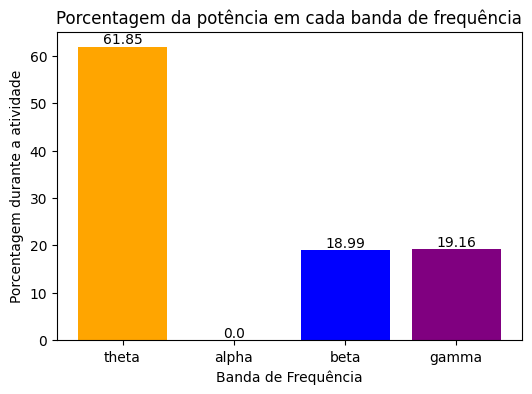

Daniella em Glucagon Ativa


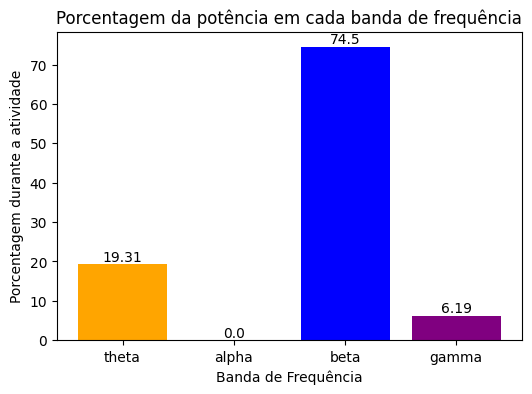

Daniella em Glucagon Ativa (Teste)


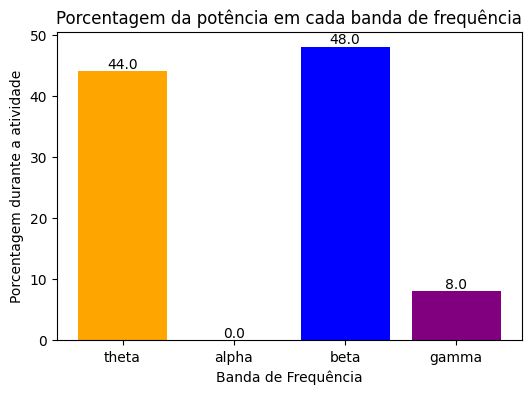

Daniella em Insulina Tradicional


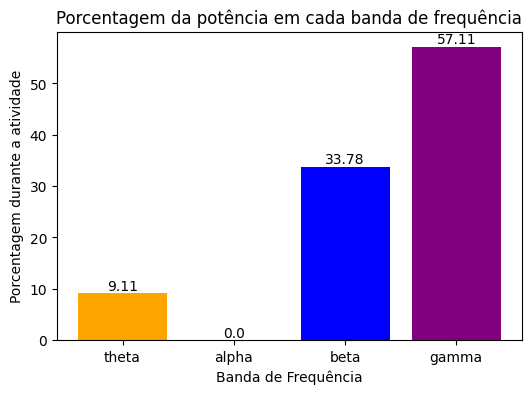

Daniella em Insulina Tradicional (Teste)


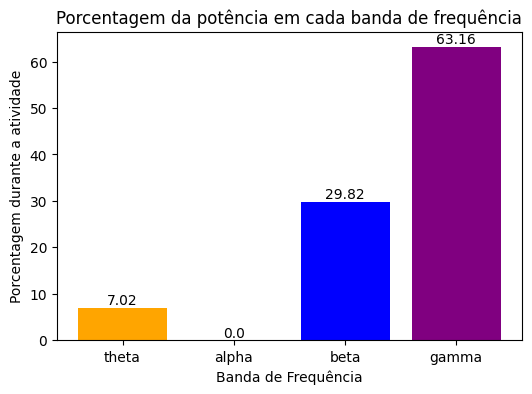

Daniella em Teste Final


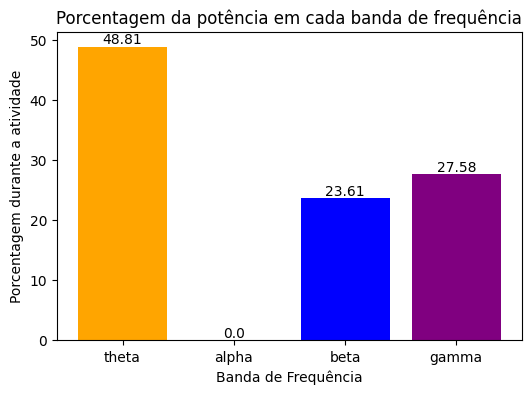

Emily em Glucagon Ativa


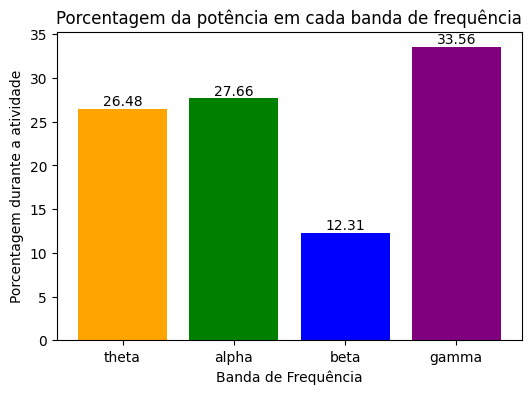

Emily em Glucagon Ativa (Teste)


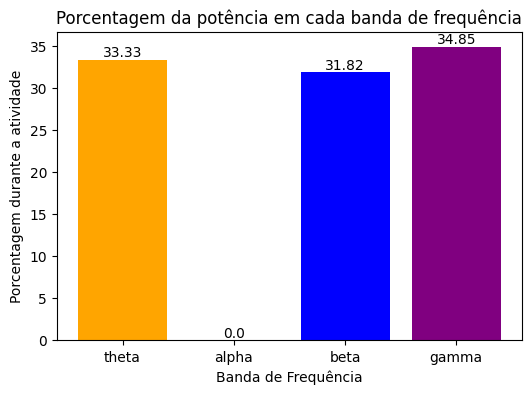

Emily em Insulina Tradicional


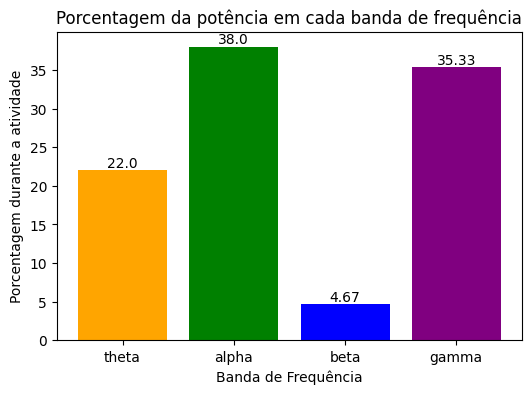

Emily em Insulina Tradicional (Teste)


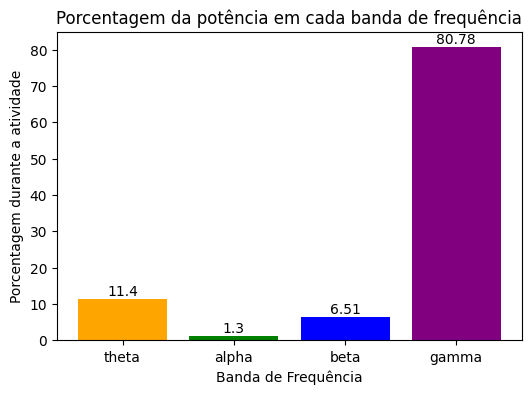

Emily em Teste Final


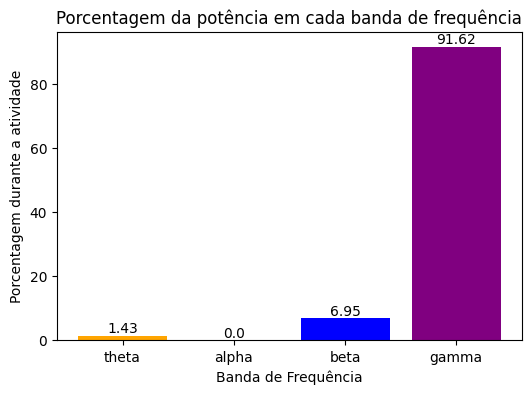

Guilherme em Glucagon Ativa


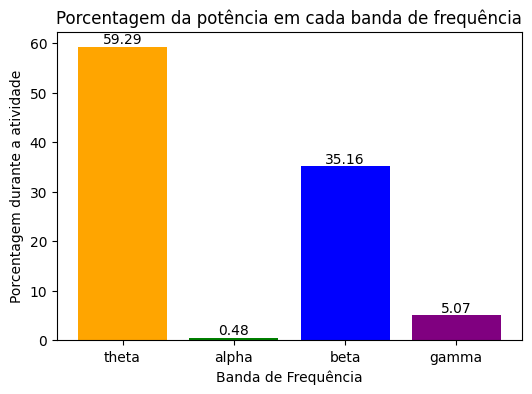

Guilherme em Glucagon Ativa (Teste)


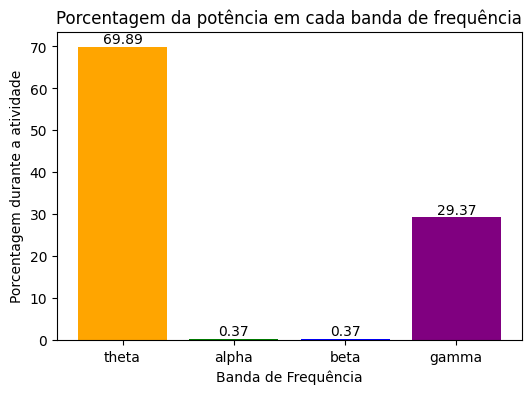

Guilherme em Insulina Tradicional


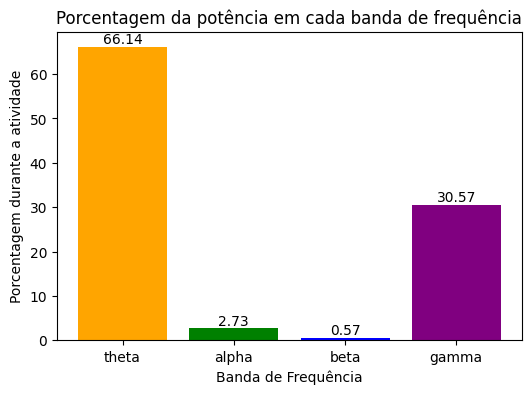

Guilherme em Insulina Tradicional (Teste)


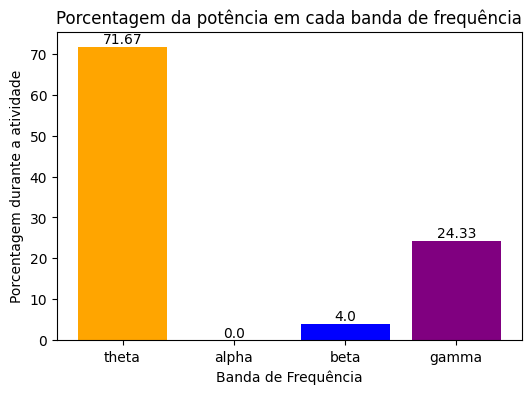

Guilherme em Teste Final


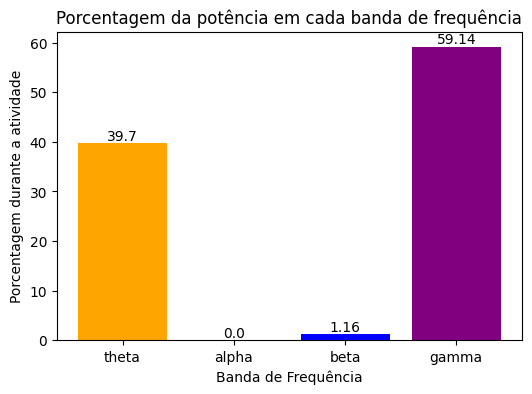

Murilo em Insulina Ativa


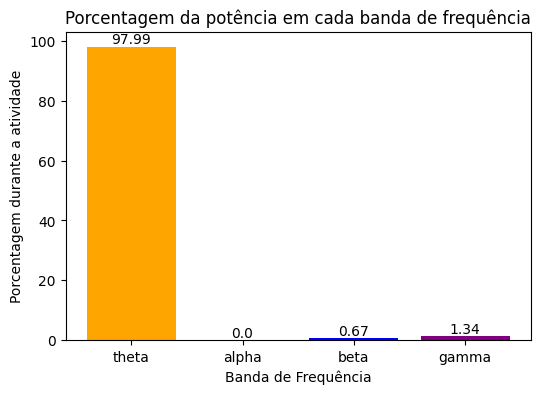

Murilo em Insulina Ativa (Teste)


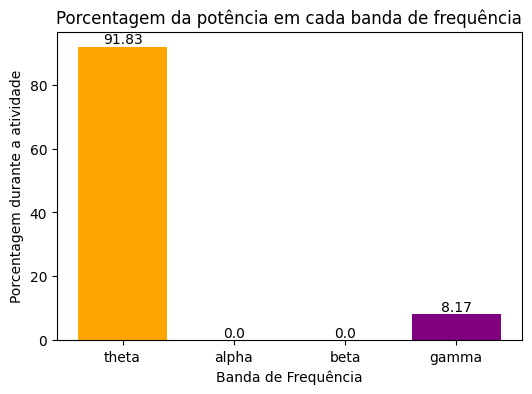

Murilo em Glucagon Tradicional


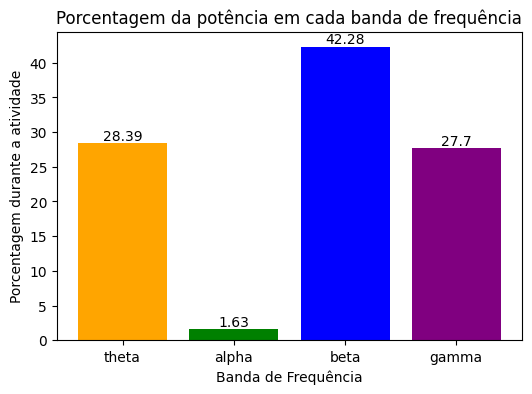

Murilo em Glucagon Tradicional (Teste)


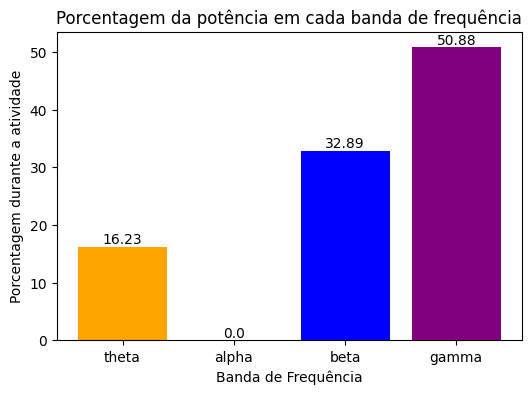

Murilo em Teste Final


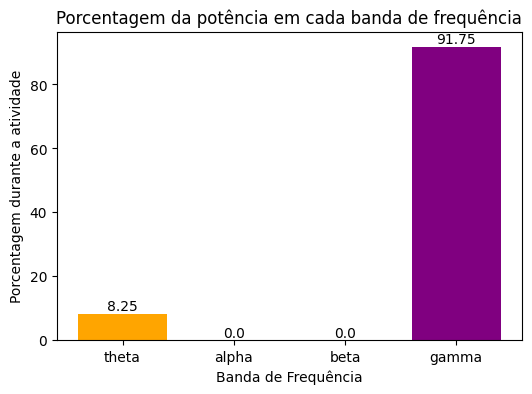

Nathalia em Insulina Ativa


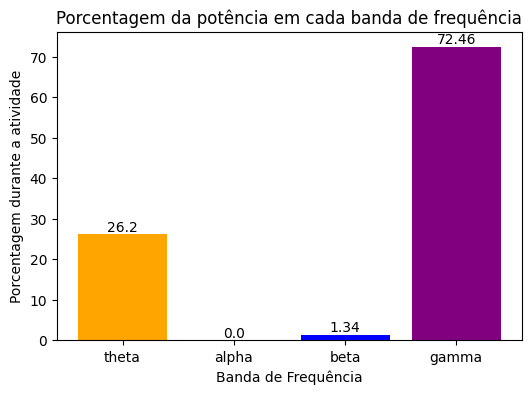

Nathalia em Insulina Ativa (Teste)


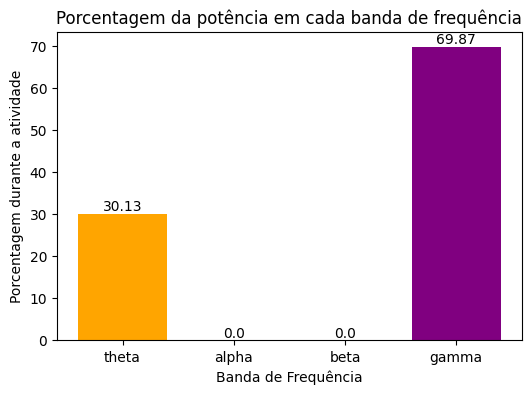

Nathalia em Glucagon Tradicional


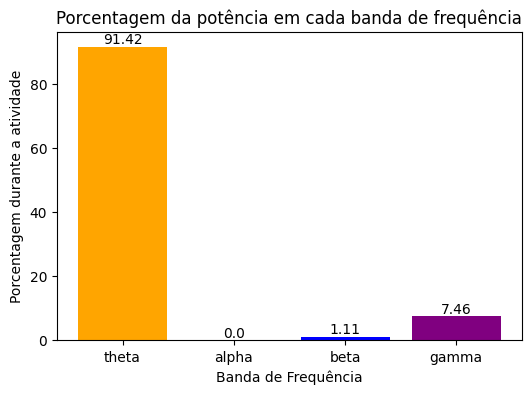

Nathalia em Glucagon Tradicional (Teste)


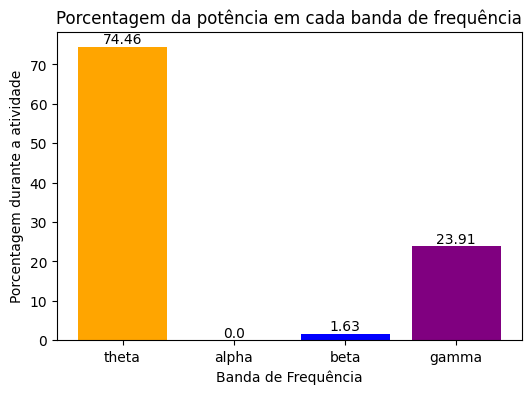

Nathalia em Teste Final


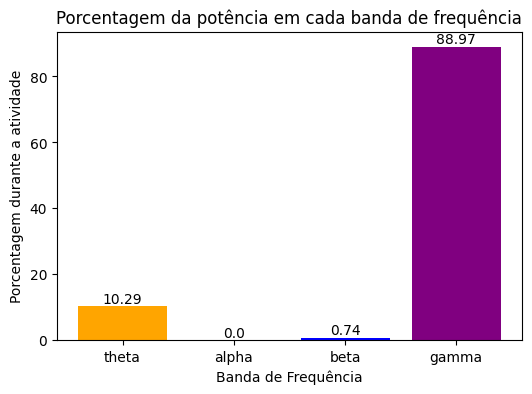

Victoria em Insulina Ativa


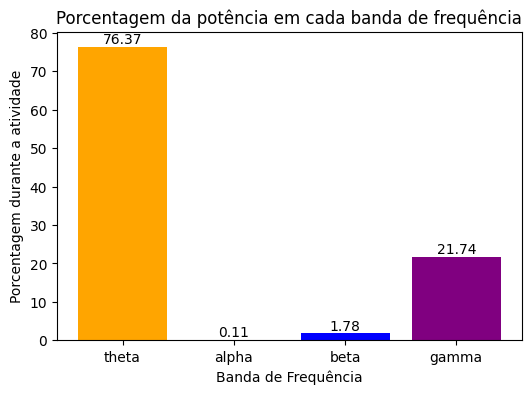

Victoria em Insulina Ativa (Teste)


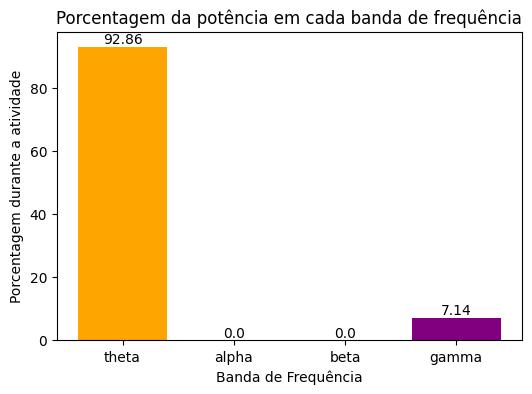

Victoria em Glucagon Tradicional


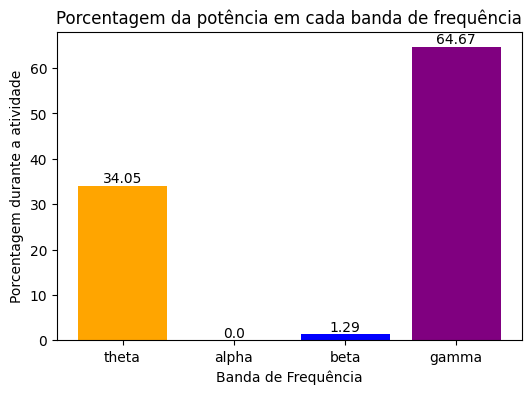

Victoria em Glucagon Tradicional (Teste)


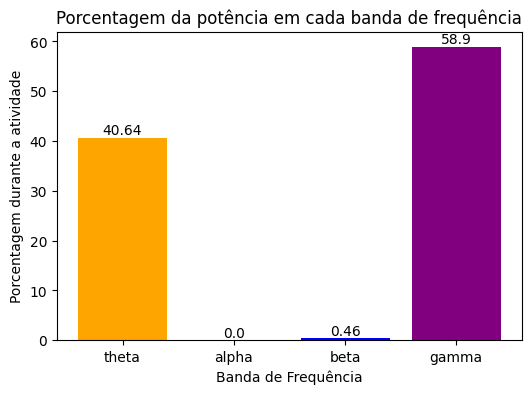

Victoria em Teste Final


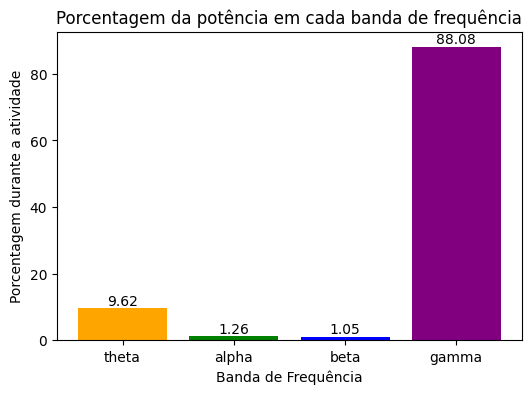

Yasmin em Insulina Ativa


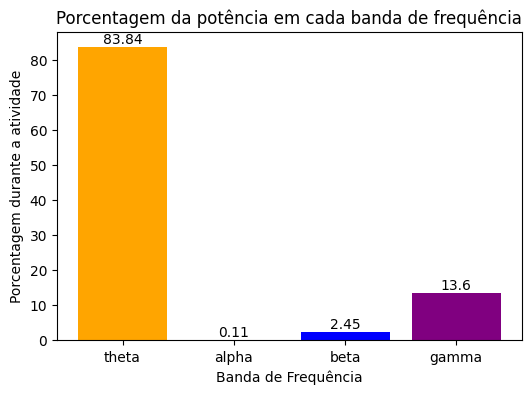

Yasmin em Insulina Ativa (Teste)


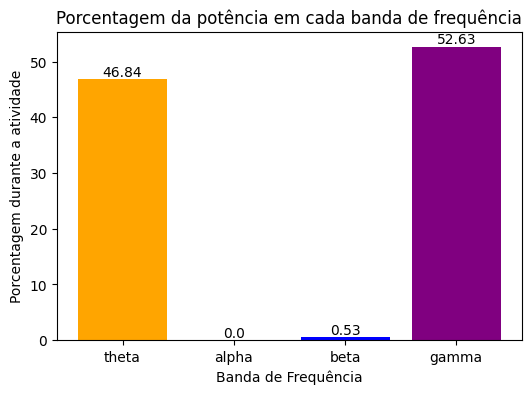

Yasmin em Glucagon Tradicional


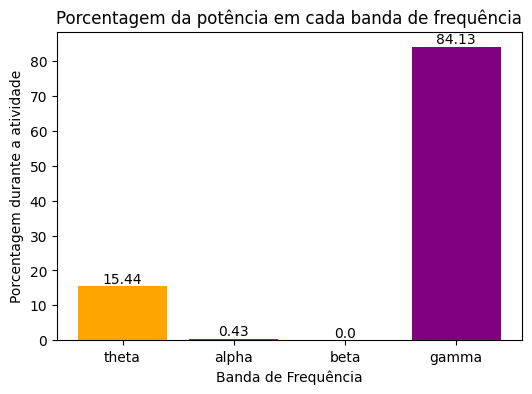

Yasmin em Glucagon Tradicional (Teste)


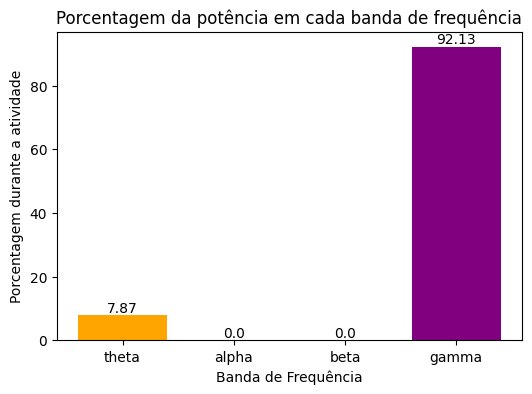

Yasmin em Teste Final


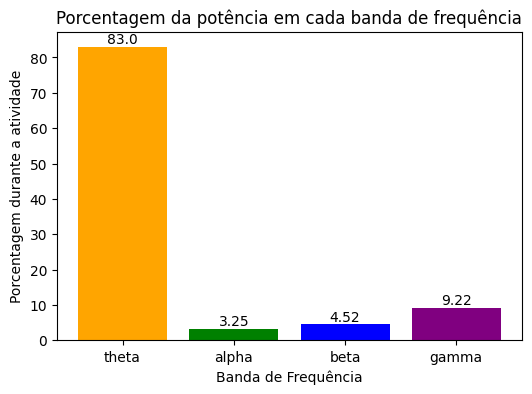

In [3]:
file_seq = (
    ('André', 'ga', 'it', 'Glucagon Ativa', 'Glucagon Ativa (Teste)', 'Insulina Tradicional', 'Insulina Tradicional (Teste)', 'Teste Final'),
    ('Daniella', 'ga', 'it', 'Glucagon Ativa', 'Glucagon Ativa (Teste)', 'Insulina Tradicional', 'Insulina Tradicional (Teste)', 'Teste Final'),
    ('Emily', 'ga', 'it', 'Glucagon Ativa', 'Glucagon Ativa (Teste)', 'Insulina Tradicional', 'Insulina Tradicional (Teste)', 'Teste Final'),
    ('Guilherme', 'ga', 'it', 'Glucagon Ativa', 'Glucagon Ativa (Teste)', 'Insulina Tradicional', 'Insulina Tradicional (Teste)', 'Teste Final'),
    ('Murilo', 'gt', 'ia', 'Insulina Ativa', 'Insulina Ativa (Teste)', 'Glucagon Tradicional', 'Glucagon Tradicional (Teste)', 'Teste Final'),
    ('Nathalia', 'gt', 'ia', 'Insulina Ativa', 'Insulina Ativa (Teste)', 'Glucagon Tradicional', 'Glucagon Tradicional (Teste)', 'Teste Final'),
    ('Victoria', 'gt', 'ia', 'Insulina Ativa', 'Insulina Ativa (Teste)', 'Glucagon Tradicional', 'Glucagon Tradicional (Teste)', 'Teste Final'),
    ('Yasmin', 'gt', 'ia', 'Insulina Ativa', 'Insulina Ativa (Teste)', 'Glucagon Tradicional', 'Glucagon Tradicional (Teste)', 'Teste Final')
)

for sub in file_seq:
    # abrindo os dados filtrados salvos em arquivos .fif (MNE)
    mne_a1 = mne.io.read_raw_fif(f'dataset/{sub[0]}/{sub[1]}_raw.fif', verbose=False)
    mne_a1_test = mne.io.read_raw_fif(f'dataset/{sub[0]}/{sub[1]}_test_raw.fif', verbose=False)
    mne_a2 = mne.io.read_raw_fif(f'dataset/{sub[0]}/{sub[2]}_raw.fif', verbose=False)
    mne_a2_test = mne.io.read_raw_fif(f'dataset/{sub[0]}/{sub[2]}_test_raw.fif', verbose=False)
    mne_test = mne.io.read_raw_fif(f'dataset/{sub[0]}/test_raw.fif', verbose=False)

    sr = 250
    jump = 5
    size = sr * jump

    datas = [mne_a1, mne_a1_test, mne_a2, mne_a2_test, mne_test]
    for k, data in enumerate(datas):
        results = [0, 0, 0, 0]
        for i in range(0, len(data)-1, sr):
            cut = data.get_data(start=i, stop=i+size)
            nperseg = 128  # Número de pontos por segmento
            noverlap = nperseg // 2  # Quantidade de sobreposição entre segmentos
            if len(cut[0]) < nperseg:
                continue
            freqs, psd = welch(cut, fs=sr, nperseg=nperseg, noverlap=noverlap)
            X = np.average(psd, axis=0)

            # Definir os limites das bandas de frequência (em Hz)
            theta_band = (4, 8)       # Theta: 4 - 8 Hz
            alpha_band = (8, 13)      # Alpha: 8 - 13 Hz
            beta_band = (13, 30)      # Beta: 13 - 30 Hz
            gamma_band = (30, 100)    # Gamma: 30 - 100 Hz

            # Encontrar os índices correspondentes às frequências de interesse
            theta_idxs = np.where((freqs >= theta_band[0]) & (freqs <= theta_band[1]))[0]
            alpha_idxs = np.where((freqs >= alpha_band[0]) & (freqs <= alpha_band[1]))[0]
            beta_idxs = np.where((freqs >= beta_band[0]) & (freqs <= beta_band[1]))[0]
            gamma_idxs = np.where((freqs >= gamma_band[0]) & (freqs <= gamma_band[1]))[0]

            # Calcular a potência em cada banda de frequência
            bands = [
                np.sum(X[theta_idxs]),
                np.sum(X[alpha_idxs]),
                np.sum(X[beta_idxs]),
                np.sum(X[gamma_idxs])
            ]
            results[np.argmax(bands)] += 1

        total = sum(results)
        
        percentages = [round((count/total) * 100, 2) for count in results]
        print(f"{sub[0]} em {sub[k + 3]}")
        plot_bar(percentages)